# table group and pivot methods
These methods are a powerful way to summarize a data set along chosen dimensions

In [2]:
from datascience import *

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Example
[See Inferential Thinking](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html?highlight=group)

[Ben & Jerry data visualization](https://benjerry.heshlindsdataviz.com)

<img src = "https://www.benjerry.com/files/live/sites/systemsite/files/US%20and%20Global%20Assets/Flavors/Product%20Assets/US/Chunky%20Monkey%20Ice%20Cream/35660_US_IC_Chunky-Monkey_473ml_Open_Brand-1902px.png" alt="Image of Ben & Jerry Chunky Monkey" width=200 />

In [3]:
IC_data = Table.read_table('data/BenJerryData.csv')
IC_data

Flavor,Calories (kcal),fat (g),sodium (mg),carbohydrates (g),protein (g),base ice cream
Peanut Butter Cup,470,33,180,36,9,peanut butter
Chubby Hubby,460,28,220,35,10,vanilla
Peanut Butter World,460,32,190,37,7,chocolate
Oat of This Swirled,420,26,150,41,5,vanilla
Everything But The...,420,26,90,40,7,chocolate
Gimmie S'more,410,24,180,45,6,vanilla
New York Super Fudge Chunk,410,26,70,39,7,chocolate
Chunky Monkey,400,25,50,41,6,vanilla
The Tonight Dough,400,22,135,47,6,vanilla
Urban Bourbon,400,22,95,44,7,caramal


### .group

Look at base ice creams

In [4]:
IC_data.group('base ice cream')

base ice cream,count
caramal,1
chocolate,3
peanut butter,1
vanilla,5


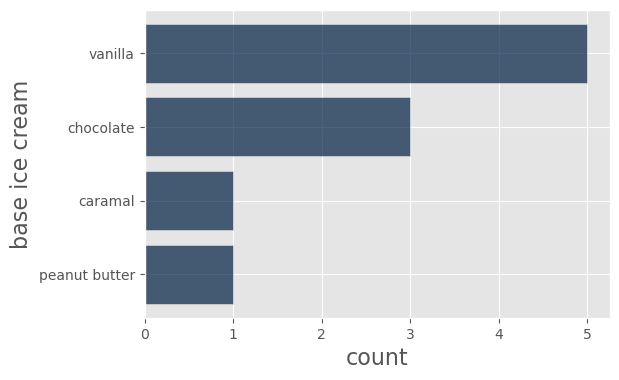

In [5]:
IC_data.group('base ice cream').sort('count', descending=True).barh('base ice cream')

In [6]:
IC_data.pivot('Flavor','fat (g)')

fat (g),Chubby Hubby,Chunky Monkey,Everything But The...,Gimmie S'more,New York Super Fudge Chunk,Oat of This Swirled,Peanut Butter Cup,Peanut Butter World,The Tonight Dough,Urban Bourbon
22,0,0,0,0,0,0,0,0,1,1
24,0,0,0,1,0,0,0,0,0,0
25,0,1,0,0,0,0,0,0,0,0
26,0,0,1,0,1,1,0,0,0,0
28,1,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,1,0,0
33,0,0,0,0,0,0,1,0,0,0


In [7]:
IC_data.pivot('base ice cream', 'Flavor', values='sodium (mg)', collect=max)

Flavor,caramal,chocolate,peanut butter,vanilla
Chubby Hubby,0,0,0,220
Chunky Monkey,0,0,0,50
Everything But The...,0,90,0,0
Gimmie S'more,0,0,0,180
New York Super Fudge Chunk,0,70,0,0
Oat of This Swirled,0,0,0,150
Peanut Butter Cup,0,0,180,0
Peanut Butter World,0,190,0,0
The Tonight Dough,0,0,0,135
Urban Bourbon,95,0,0,0


### Now you try
Group on 'base ice cream' again, but instead of summarizing with the default, which is count, use max.

 Make a horizontal bar chart with ice cream flavors in descending order of salt content

Now create a pivot table with 'base ice cream' and 'Flavor', but this time set values to calories.

Make a scatter plot of the original table, plotting fat vs. calories. Include a best-fit straight line. Do you think there is a strong correlation?